# load Argo data for DAS analysis (July 2019)

to do:

- [ ] add map with locations
- [X] compare and combine with climatology (WOA)

Data downloaded from [EuroArgo website](https://dataselection.euro-argo.eu)


In [1]:
import os
from glob import glob

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import dashydro.hydro as hy

hours = 3600
days = 86400

--- 
### load data

In [2]:
#root_dir = "/Users/aponte/Data/das"
root_dir = "/Users/aponte/Cloud/Dropbox/Public/das"
data_dir = os.path.join(root_dir, "argo/")

nc_files = glob(data_dir+"/*.nc")[:-1] # last files has issues don't know why
codes = [f.split("_")[-1].replace(".nc","") for f in nc_files]
print(codes)

['6902969', '6901250', '6902954', '3901849']


In [3]:
data = {int(c): hy.load_argo_nc(f) for f, c in zip(nc_files, codes)}

Load WOA climatology

In [4]:
woa = hy.load_woa(lon=5.9, lat=42.8) # approximate cable coordinates

Data nearby the cable (from EuroArgo maps):

- Float 6901250 (cycles 137, 38)
- Float 6902969 (cycles 32)

---
### inspect 6901250

In [5]:
ds = data[6901250]
ds_smooth = hy.smooth(ds, dz=5, depth_max=100)

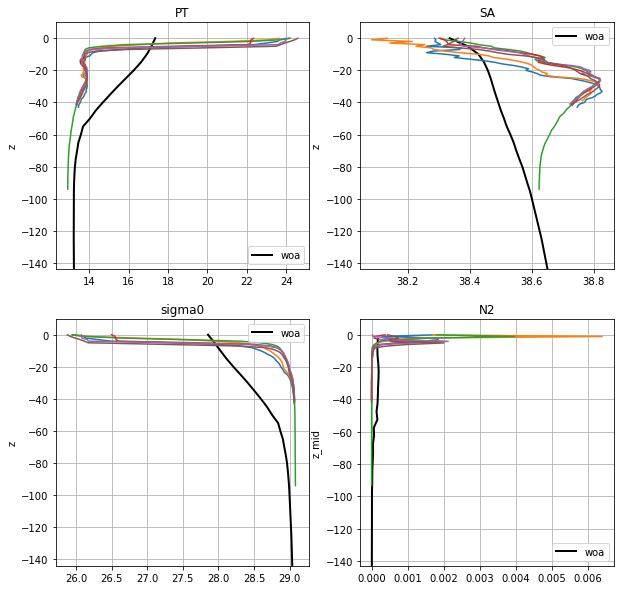

In [6]:
hy.plot_argo_profiles(ds, woa=woa);

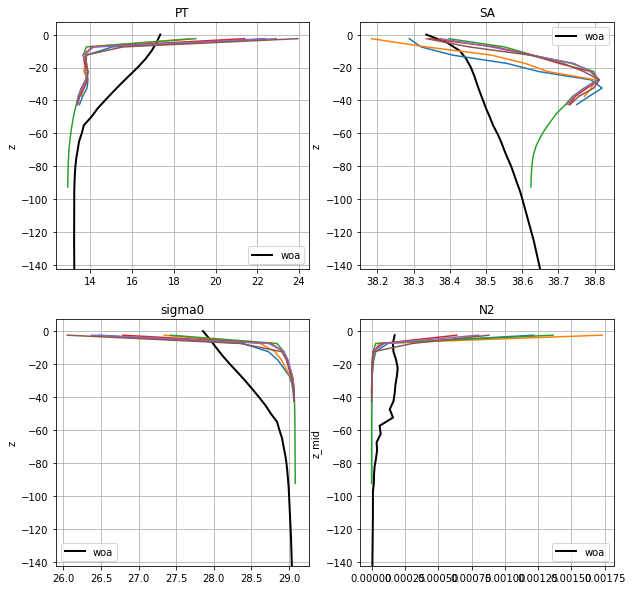

In [7]:
hy.plot_argo_profiles(ds_smooth, woa=woa);

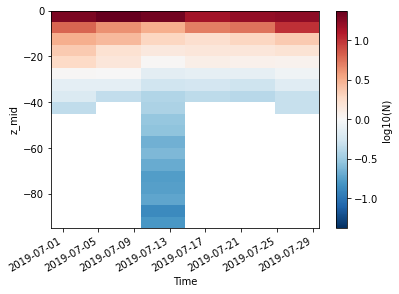

In [8]:
_N = (np.sqrt(ds_smooth.N2)*hours/2/np.pi).rename("N")
np.log10(_N).rename("log10(N)").plot(y="z_mid"); # in cycles per hours

Convert into period in hours

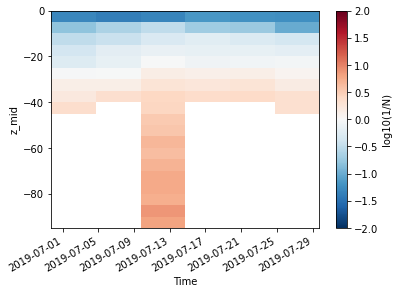

In [9]:
np.log10(1/_N).rename("log10(1/N)").plot(y="z_mid", vmin=-2);

Vertical gradient of temperature

Values are quickly around 1e-3 degC / m

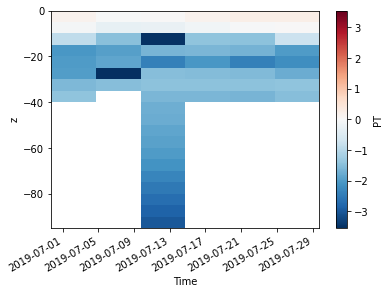

In [10]:
np.log10(abs(-ds_smooth.PT.differentiate("DEPTH"))).plot(y="z")

---

### inspect 6902969

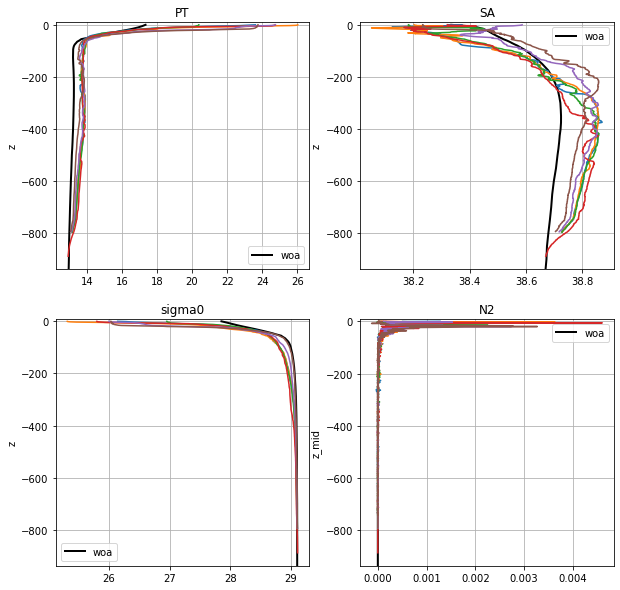

In [11]:
ds = data[6902969]
ds_smooth = hy.smooth(ds)

hy.plot_argo_profiles(ds, woa=woa);

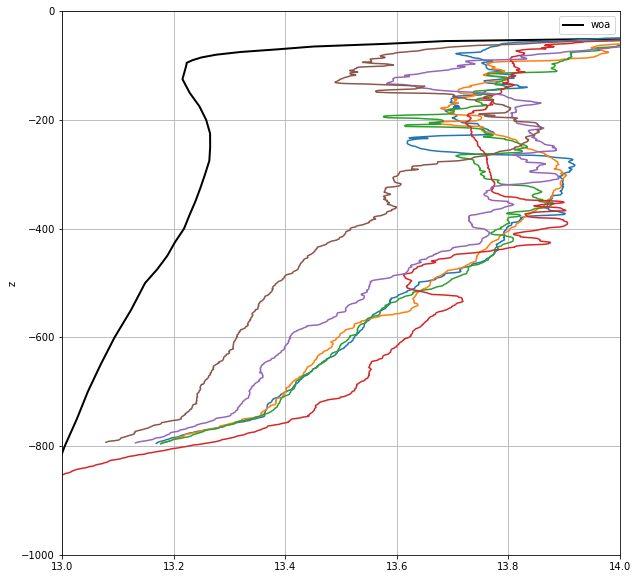

In [12]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

_da = ds["PT"]

woa["PT"].plot.line(y="z", color="k", lw=2, add_legend=False, ax=ax, label="woa")
_da.plot.line(y="z", add_legend=False, ax=ax)
ax.grid()
ax.set_xlabel("")
#ax.set_title(v)
ax.set_xlim((13,14))
ax.set_ylim(-1000,0)
ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


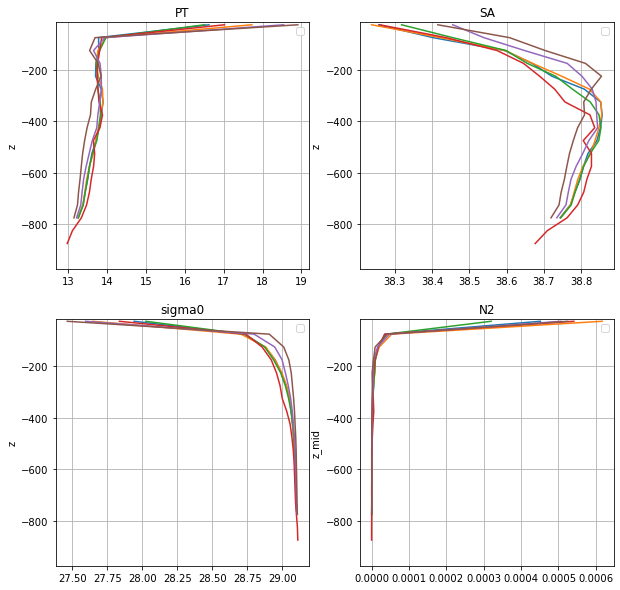

In [13]:
hy.plot_argo_profiles(ds_smooth);

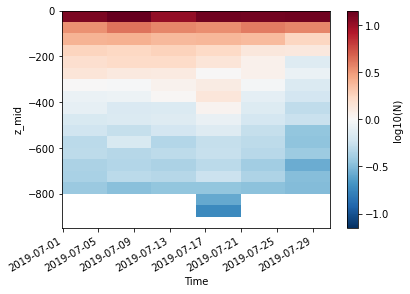

In [14]:
_N = (np.sqrt(ds_smooth.N2)*hours/2/np.pi).rename("N")
np.log10(_N).rename("log10(N)").plot(y="z_mid"); # in cycles per hours

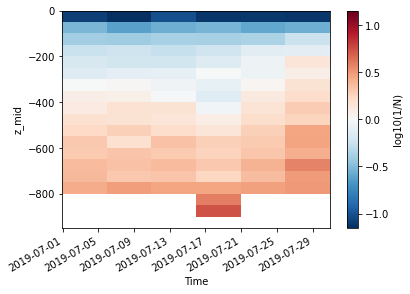

In [15]:
np.log10(1/_N).rename("log10(1/N)").plot(y="z_mid",); 

In [20]:
_Nwoa

<xarray.DataArray 'N2' (depth_mid: 101)>
array([7.53699352, 7.24626419, 7.33786069, 7.76770687, 8.02014699,
       7.89134326, 7.66498043, 7.5493851 , 7.34894034, 6.68860227,
       7.26256132, 4.44518383, 4.73302147, 3.51793934, 3.68552085,
       3.26432303, 2.7126996 , 2.42764158, 2.34458949, 1.81646437,
       1.78702596, 1.45460147, 1.26740791, 1.00645924, 0.93557734,
       0.93083669, 0.72459909, 0.77217429, 0.59447991, 0.58133858,
       0.52686842, 0.34214667, 0.38120871, 0.42904159, 0.50016327,
       0.52992817, 0.29719759, 0.18022498, 0.26425503, 0.38222478,
       0.20443192, 0.20912687, 0.14101553, 0.12540118, 0.15771682,
       0.25165182, 0.1383552 , 0.18942208, 0.17816524, 0.09668056,
       0.10441352, 0.15159508, 0.1719851 , 0.13230217, 0.09512943,
       0.16832711, 0.026538  ,        nan, 0.19618797, 0.14440764,
       0.21273183, 0.07177882, 0.23161104, 0.16273055, 0.20148741,
       0.25472725, 0.07249925, 0.1491283 , 0.14705131,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan])
Coordinates:
    lat      float32 42.5
    lon      float32 5.5
    time     float32 726.0
    p_mid    (depth_mid) float64 2.52 7.56 12.6 17.64 22.68 ... nan nan nan nan
    z_mid    (depth_mid) float32 -2.5 -7.5 -12.5 ... -5.35e+03 -5.45e+03
Dimensions without coordinates: depth_mid

/Users/aponte/.miniconda3/envs/dashydro/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


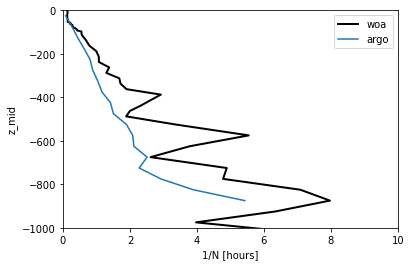

In [28]:


fig, ax = plt.subplots(1,1)

_Nwoa = np.sqrt(woa["N2"])*hours/2/np.pi  
(1/_Nwoa).plot.line(y="z_mid", color="k", lw=2, add_legend=False, label="woa")

(1/_N).mean("TIME").rename("1/N [hours]").plot(y="z_mid", label="argo"); 
ax.set_ylim(-1000,0)
ax.set_xlim(0,10)
ax.legend()

Vertical gradient of temperature

Values are quickly around 1e-3 degC / m

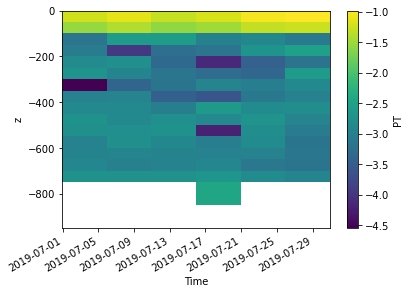

In [17]:
np.log10(abs(-ds_smooth.PT.differentiate("DEPTH"))).plot(y="z")